<a href="https://colab.research.google.com/github/Anaya666/Anaya666/blob/main/swimming_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("datasciencedonut/olympic-swimming-1912-to-2020")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/datasciencedonut/olympic-swimming-1912-to-2020/versions/2


In [28]:
#loading the dataset
import os
# Define the directory path where the dataset is stored
directory_path = "/root/.cache/kagglehub/datasets/datasciencedonut/olympic-swimming-1912-to-2020/versions/2"

# List files in the directory
files = os.listdir(directory_path)
print("Files in directory:", files)  # This will help identify the correct CSV file

# Find the correct CSV file (assuming there's only one CSV file)
csv_files = [f for f in files if f.endswith(".csv")]

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV file found in the directory.")
elif len(csv_files) > 1:
    print("Multiple CSV files found, using the first one:", csv_files[0])

# Full path to the CSV file
file_path = os.path.join(directory_path, csv_files[0])

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Overview:")
print(df.info())

Files in directory: ['Olympic_Swimming_Results_1912to2020.csv']
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Location              4359 non-null   object
 1   Year                  4359 non-null   int64 
 2   Distance (in meters)  4359 non-null   object
 3   Stroke                4359 non-null   object
 4   Relay?                4359 non-null   int64 
 5   Gender                4359 non-null   object
 6   Team                  4359 non-null   object
 7   Athlete               4345 non-null   object
 8   Results               4331 non-null   object
 9   Rank                  4359 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 340.7+ KB
None


In [29]:
#checking for missing values
print(df.isnull().sum())
#replace missing values in athlete and results column with "unknown"
df["Athlete"].fillna("unknown", inplace=True)
df["Results"].fillna("unknown", inplace=True)
#checking for missing values
print(df.isnull().sum())

Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64
Location                0
Year                    0
Distance (in meters)    0
Stroke                  0
Relay?                  0
Gender                  0
Team                    0
Athlete                 0
Results                 0
Rank                    0
dtype: int64


<ipython-input-29-e81b364847f0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Athlete"].fillna("unknown", inplace=True)
<ipython-input-29-e81b364847f0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

Q1 - How has Olympic swimming evolved over the years?
This question helps uncover trends in performance, participation, and competitiveness over time.


exploration 1a- I will Create 6 line charts (1 chart per stroke) showing the trend of winning times for different distances from 1912 to 2020.

In [30]:
#find and list unique distances
unique_distances = df["Distance (in meters)"].unique()
print("\nNumber of Unique Distances:", unique_distances)
#I will not group distances into ranges so that I can create a smaller number of categories because
#each distance requires athletes to have different and unique strategies


Number of Unique Distances: ['100m' '1500m' '200m' '400m' '50m' '800m' '4x100' '4x200']



Unique Distances: ['100m', '1500m', '200m', '400m', '4x100', '4x200', '50m', '800m']


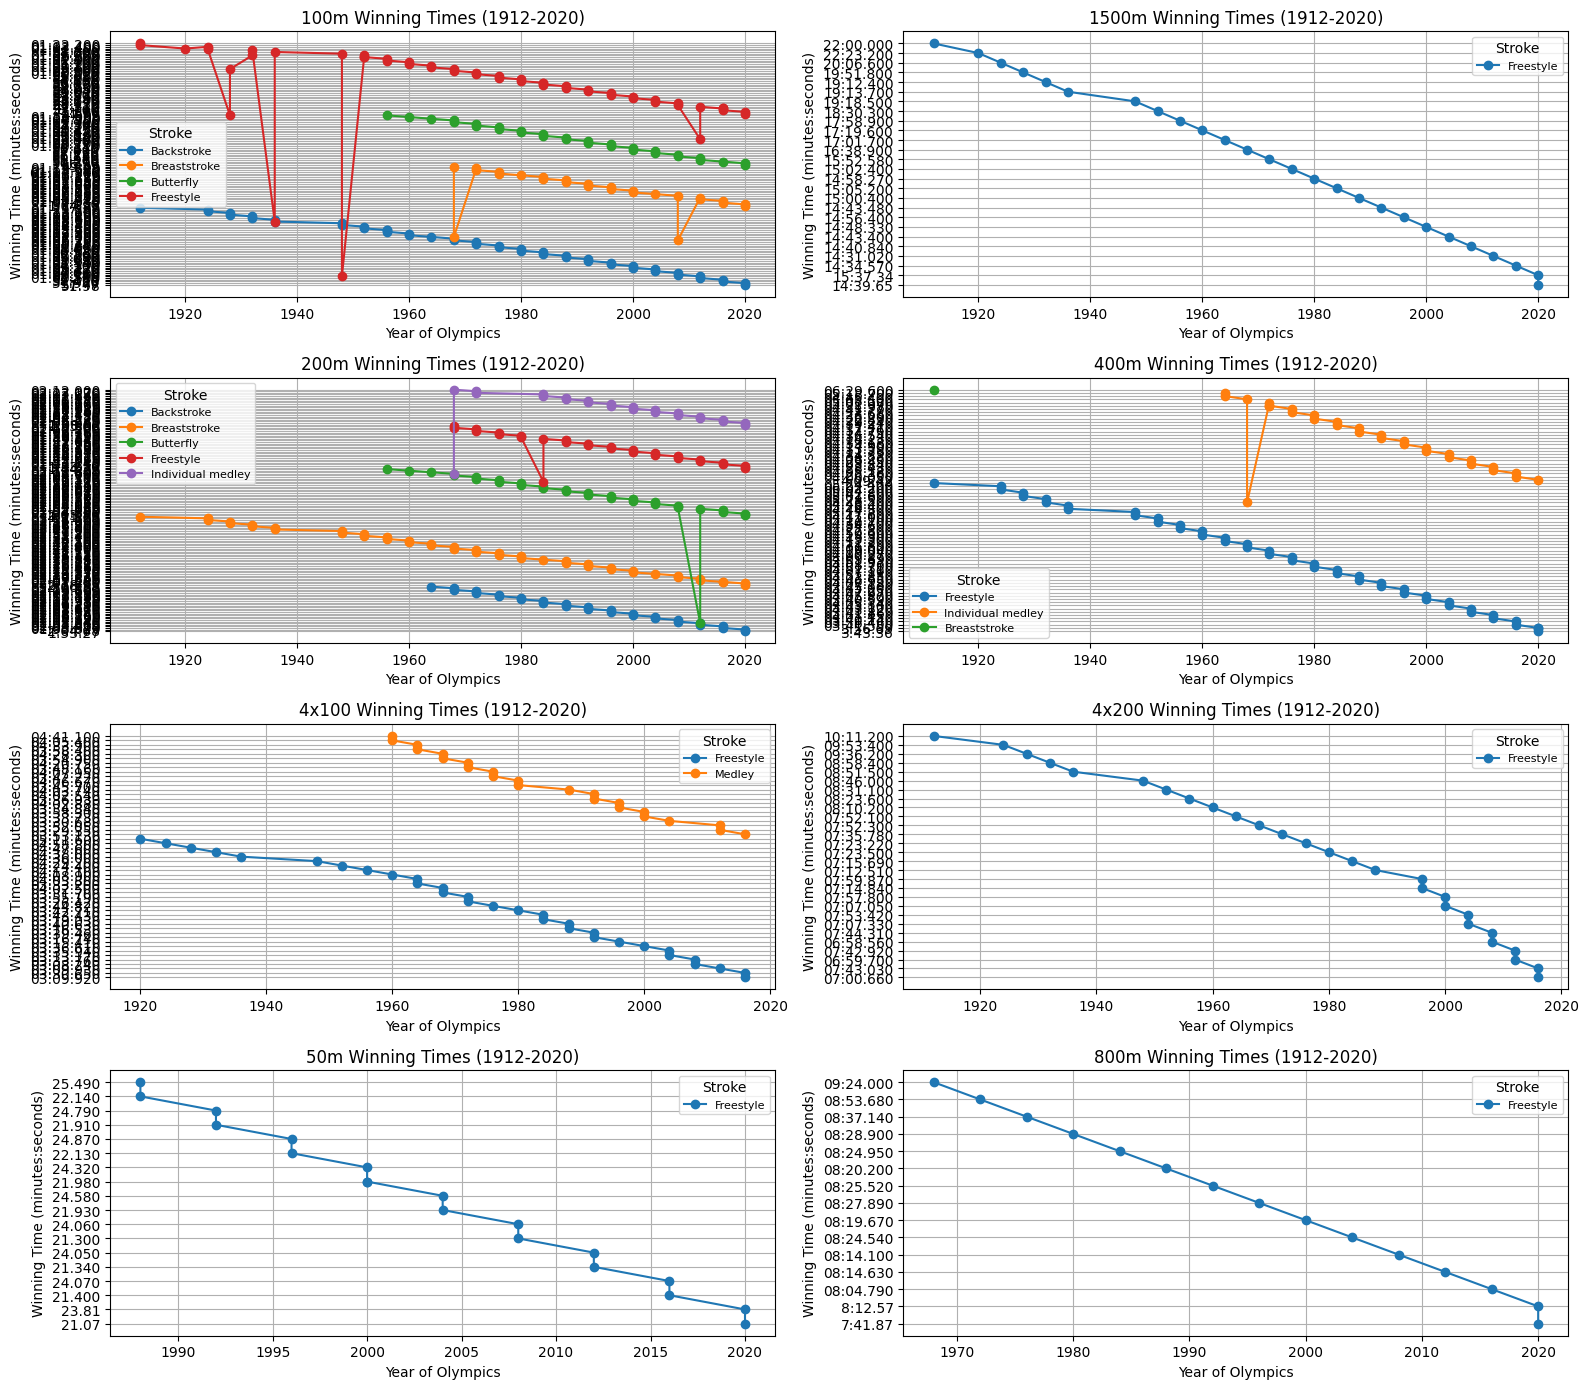

In [33]:
#plot 8 line charts (1 chart of each distance) with year of olympics (1912-2020) on the x axis and winning time (time of the gold medalist) on y axis.
#I plotted one chart for each distance because timings are very close for shorter distances but vary between strokes
# Convert Year column to numeric (if it's not already)
# Load dataset (use correct file path)

# Convert 'Year' column to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Function to abbreviate time format
def abbreviate_time(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # Format: HH:MM:SS.ssssss
            minutes = parts[1]
            seconds = parts[2][:6]
            return f"{minutes}:{seconds}"
        else:
            return time_str
    except:
        return time_str

# Apply formatting to 'Results' column
df["Results"] = df["Results"].astype(str).apply(abbreviate_time)

# Filter only gold medalists (Rank = 1)
gold_medalists = df[df["Rank"] == 1]

# Get unique distances
unique_distances = sorted(gold_medalists["Distance (in meters)"].unique())
print("\nUnique Distances:", unique_distances)

# Plot one chart per distance (strokes are different lines within each chart)
plt.figure(figsize=(16, 14))

for i, distance in enumerate(unique_distances, 1):
    plt.subplot(4, 2, i)  # Arrange in 4x2 grid

    # Filter data for current distance
    distance_data = gold_medalists[gold_medalists["Distance (in meters)"] == distance]

    # Plot each stroke as a separate line
    for stroke in distance_data["Stroke"].unique():
        stroke_data = distance_data[distance_data["Stroke"] == stroke]
        plt.plot(stroke_data["Year"], stroke_data["Results"], marker='o', label=stroke)

    # Chart formatting
    plt.title(f"{distance} Winning Times (1912-2020)")
    plt.xlabel("Year of Olympics")
    plt.ylabel("Winning Time (minutes:seconds)")
    plt.legend(title="Stroke", fontsize=8)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
#the graph y axis for all events except the medley 4 X 100 distance are highly cramped so I want to keep the graph as it is but I want to
#get sections of winning times on the y axis for clarity of representation.
#listing winning times for backstroke
backstroke_data = gold_medalists[gold_medalists["Stroke"] == "Backstroke"]
print(backstroke_data["Results"])

0           51.98
40        1:53.27
112         57.47
152       2:04.68
224        51.970
          ...    
4075    01:08.200
4083    01:22.000
4160    01:13.200
4168    01:23.200
4296    01:21.200
Name: Results, Length: 76, dtype: object


In [42]:
# Filter only gold medalists (Rank = 1) and selected distances
selected_distances = [100, 200, 400, "4x100"]
filtered_df = df[(df["Rank"] == 1) & (df["Distance (in meters)"].isin(selected_distances))]

# Find min & max times for each distance
# Change 'Results (seconds)' to 'Results'
time_ranges = filtered_df.groupby("Distance (in meters)")["Results"].agg(["min", "max"]).reset_index()
print(time_ranges)

  Distance (in meters)        min        max
0                4x100  03:08.240  05:11.600


Exploration 1b- Next, I want to analyse the spread of Finishing Times in Different Decades from the year 1910 to 2020 using a box-plot.

<Figure size 1200x600 with 0 Axes>

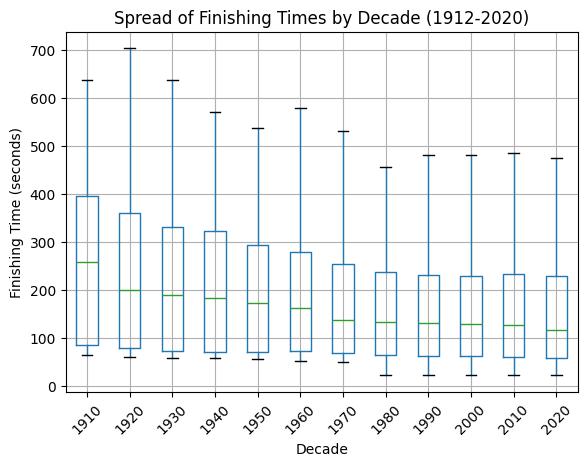

In [43]:
# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Function to convert time to numeric (float, in seconds)
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS.ssssss
            total_seconds = int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
            return total_seconds
        elif len(parts) == 2:  # MM:SS.ssssss
            total_seconds = int(parts[0]) * 60 + float(parts[1])
            return total_seconds
        else:
            return float(time_str)  # If it's already in seconds
    except:
        return None  # Handle errors gracefully

# Apply time conversion to 'Results' column
df["Results (seconds)"] = df["Results"].astype(str).apply(time_to_seconds)

# Create a new column for decades
df["Decade"] = (df["Year"] // 10) * 10  # Example: 1996 → 1990s

# Filter out missing values
df_cleaned = df.dropna(subset=["Results (seconds)", "Decade"])

# Create a box plot to show the spread of finishing times by decade
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column="Results (seconds)", by="Decade", showfliers=False)  # Remove extreme outliers

# Chart formatting
plt.title("Spread of Finishing Times by Decade (1912-2020)")
plt.suptitle("")  # Remove automatic title
plt.xlabel("Decade")
plt.ylabel("Finishing Time (seconds)")
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.grid(True)

# Show the plot
plt.show()

Analysis of the box plot:
Early decades (1910s-1950s) → The boxes are wider, meaning higher variability in finishing times. This suggests:
A larger gap between the fastest and slowest swimmers.
Training methods and techniques were less advanced.
Equipment (swimwear, pools, technology) had room for improvement.
Recent decades (1980s-2020s) → The boxes narrow down, indicating:
Swimmers are finishing closer together.
The level of competition has increased, making races more intense.
Better training, sports science, and technological improvements (pool designs, starting blocks, swimwear).
Median Winning Times Have Dropped
The green line (median) inside each box shows the typical winning time.
Over the years, it steadily moves downward, meaning swimmers are getting faster.
This is expected as sports science, strength training, and swim techniques have improved.The height of the boxes shrinks after 1980, meaning the difference between fastest and slowest times is decreasing.
This suggests that elite swimmers are now competing at a much closer level.
Implication: Winning by milliseconds is more common today than in the past, where there were large gaps between winners and other competitors.


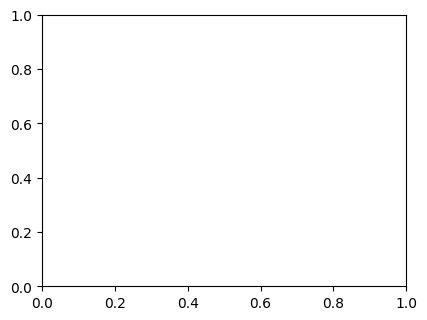

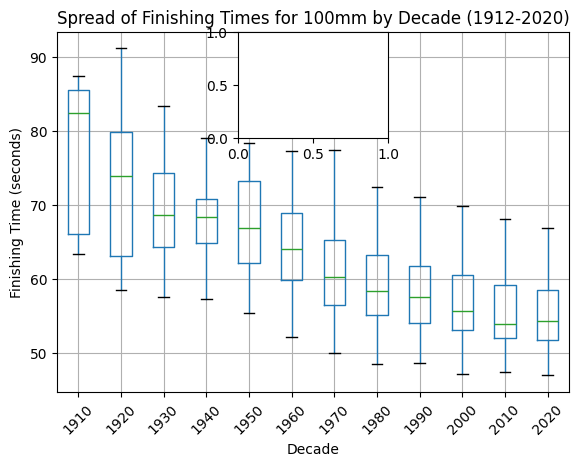

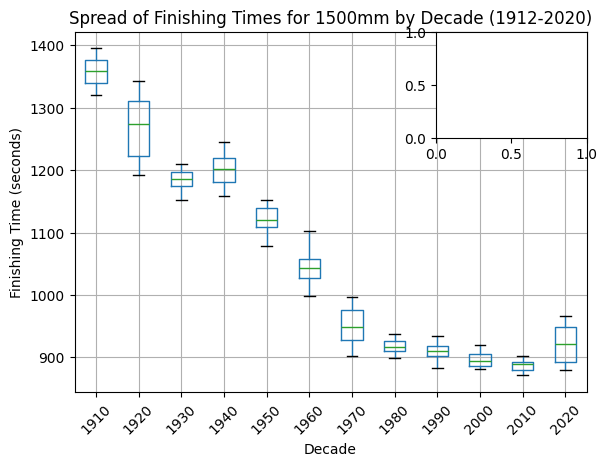

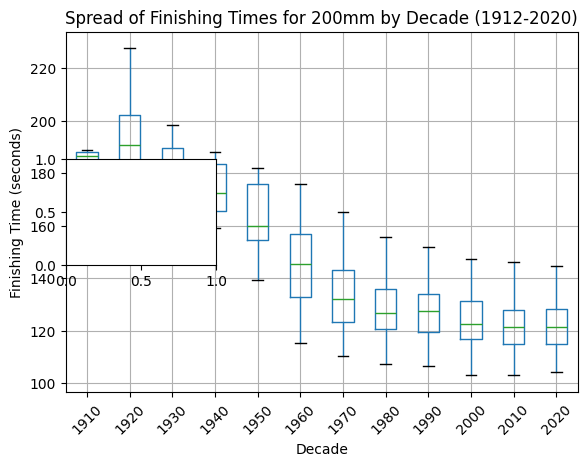

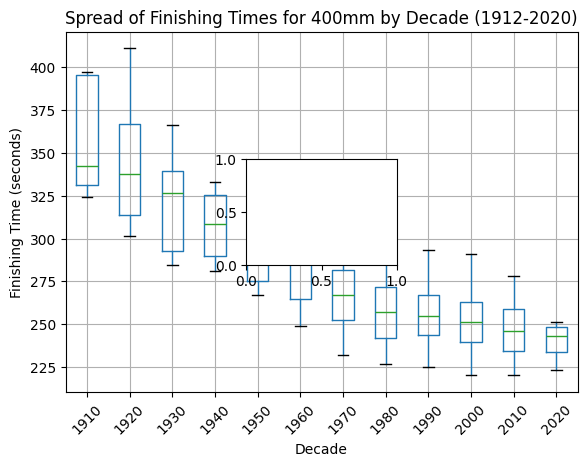

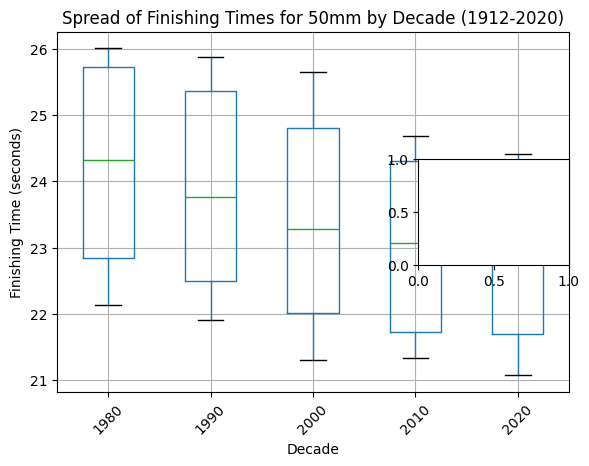

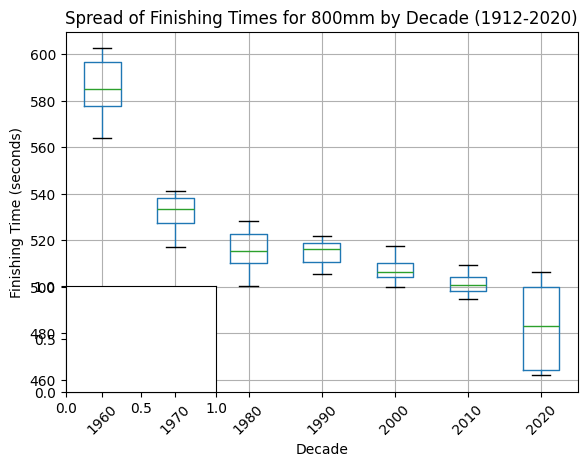

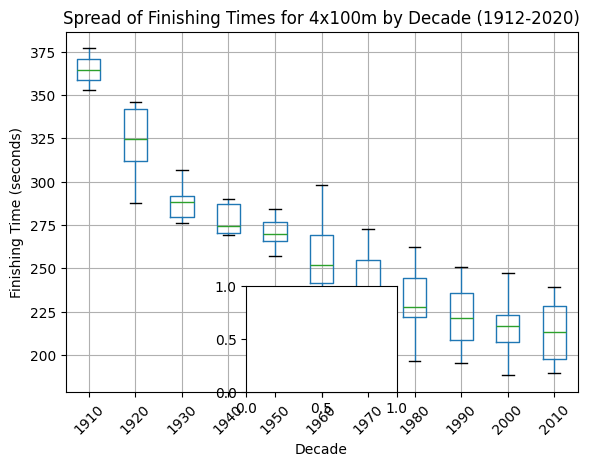

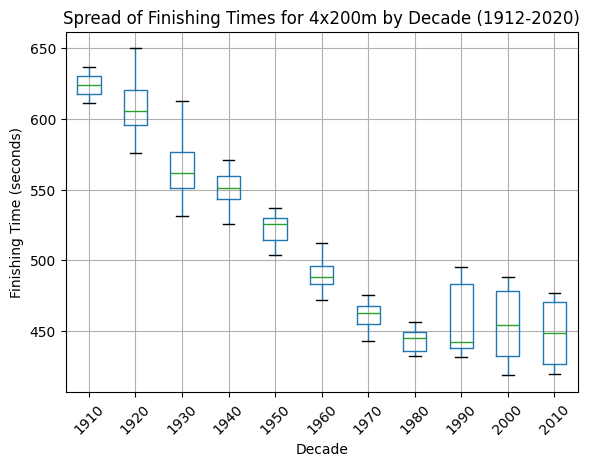

In [45]:
# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Function to convert time to numeric (float, in seconds)
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS.ssssss
            total_seconds = int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
            return total_seconds
        elif len(parts) == 2:  # MM:SS.ssssss
            total_seconds = int(parts[0]) * 60 + float(parts[1])
            return total_seconds
        else:
            return float(time_str)  # If it's already in seconds
    except:
        return None  # Handle errors gracefully

# Apply time conversion to 'Results' column
df["Results (seconds)"] = df["Results"].astype(str).apply(time_to_seconds)

# Create a new column for decades
df["Decade"] = (df["Year"] // 10) * 10  # Example: 1996 → 1990s

# Filter out missing values
df_cleaned = df.dropna(subset=["Results (seconds)", "Decade"])

# Get unique distances
unique_distances = df_cleaned["Distance (in meters)"].unique()

# Create separate box plots for each distance
plt.figure(figsize=(16, 12))

for i, distance in enumerate(unique_distances, 1):
    plt.subplot(3, 3, i)  # Arrange in a grid layout

    # Filter data for current distance
    distance_data = df_cleaned[df_cleaned["Distance (in meters)"] == distance]

    # Create box plot
    distance_data.boxplot(column="Results (seconds)", by="Decade", showfliers=False)

    # Formatting
    plt.title(f"Spread of Finishing Times for {distance}m by Decade (1912-2020)")
    plt.suptitle("")  # Remove automatic title
    plt.xlabel("Decade")
    plt.ylabel("Finishing Time (seconds)")
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

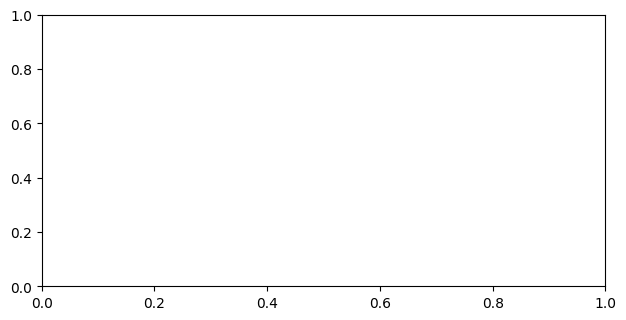

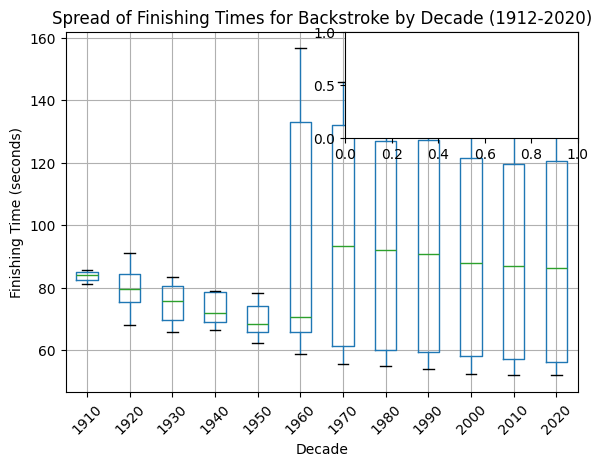

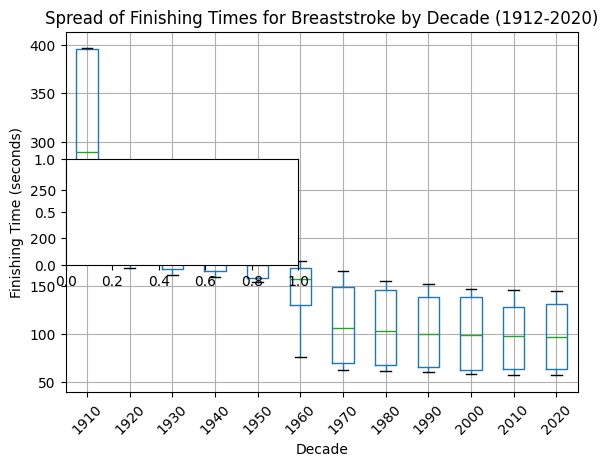

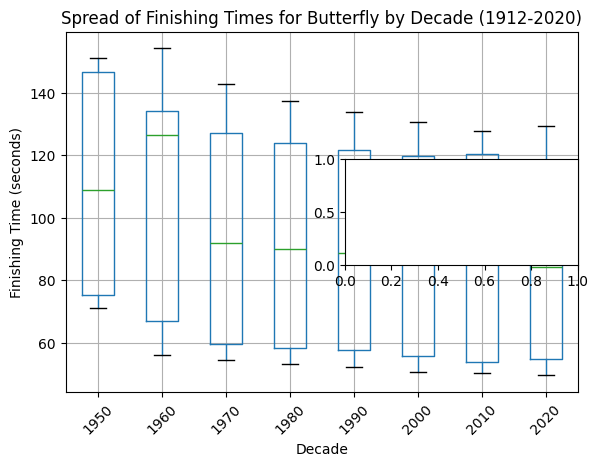

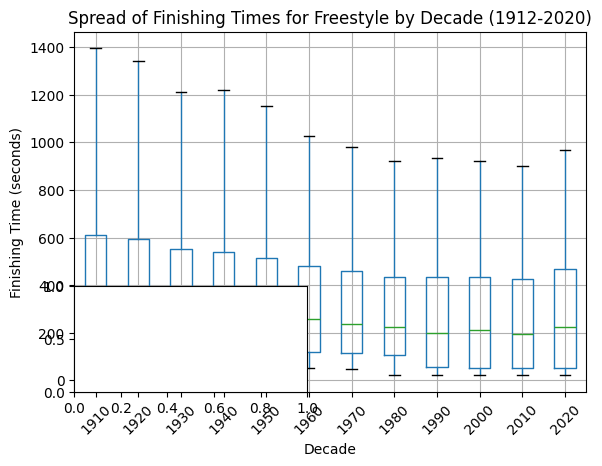

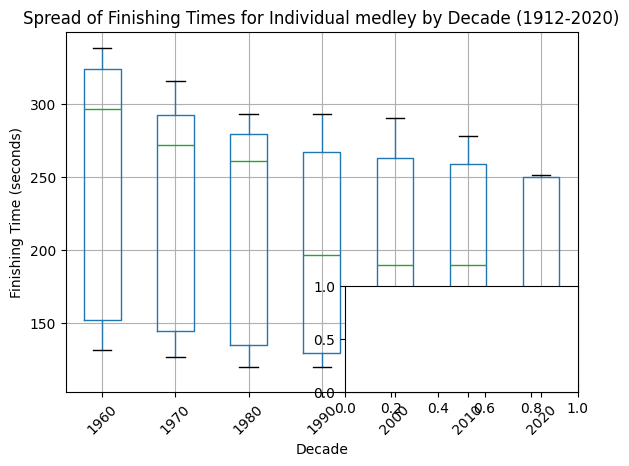

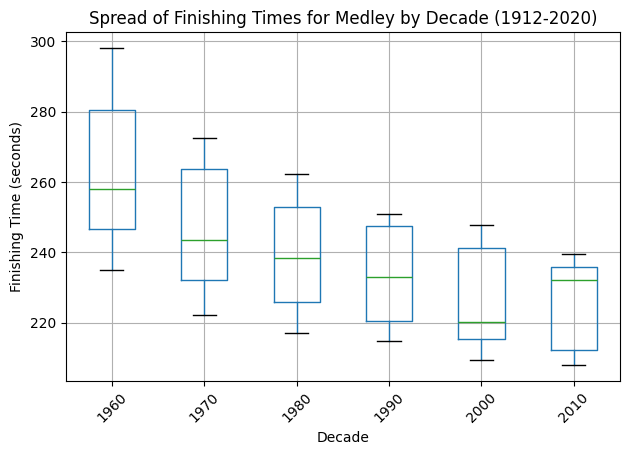

In [47]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Function to convert time to numeric (float, in seconds)
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS.ssssss
            total_seconds = int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
            return total_seconds
        elif len(parts) == 2:  # MM:SS.ssssss
            total_seconds = int(parts[0]) * 60 + float(parts[1])
            return total_seconds
        else:
            return float(time_str)  # If it's already in seconds
    except:
        return None  # Handle errors gracefully

# Apply time conversion to 'Results' column
df["Results (seconds)"] = df["Results"].astype(str).apply(time_to_seconds)

# Create a new column for decades
df["Decade"] = (df["Year"] // 10) * 10  # Example: 1996 → 1990s

# Ensure "Stroke" column exists and filter out missing values
df_cleaned = df.dropna(subset=["Results (seconds)", "Decade", "Stroke"])

# Get unique strokes
unique_strokes = df_cleaned["Stroke"].unique()

# Create separate box plots for each stroke
plt.figure(figsize=(16, 12))

for i, stroke in enumerate(unique_strokes, 1):
    plt.subplot(3, 2, i)  # Arrange in a grid layout

    # Filter data for current stroke
    stroke_data = df_cleaned[df_cleaned["Stroke"] == stroke]

    # Create box plot
    stroke_data.boxplot(column="Results (seconds)", by="Decade", showfliers=False)

    # Formatting
    plt.title(f"Spread of Finishing Times for {stroke} by Decade (1912-2020)")
    plt.suptitle("")  # Remove automatic title
    plt.xlabel("Decade")
    plt.ylabel("Finishing Time (seconds)")
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

Exploration 1c: I decided to create a heatmap to visualise the frequency of swimming events contested in the Olympics from the year 1912 to 2020 categorised by stroke and distance.

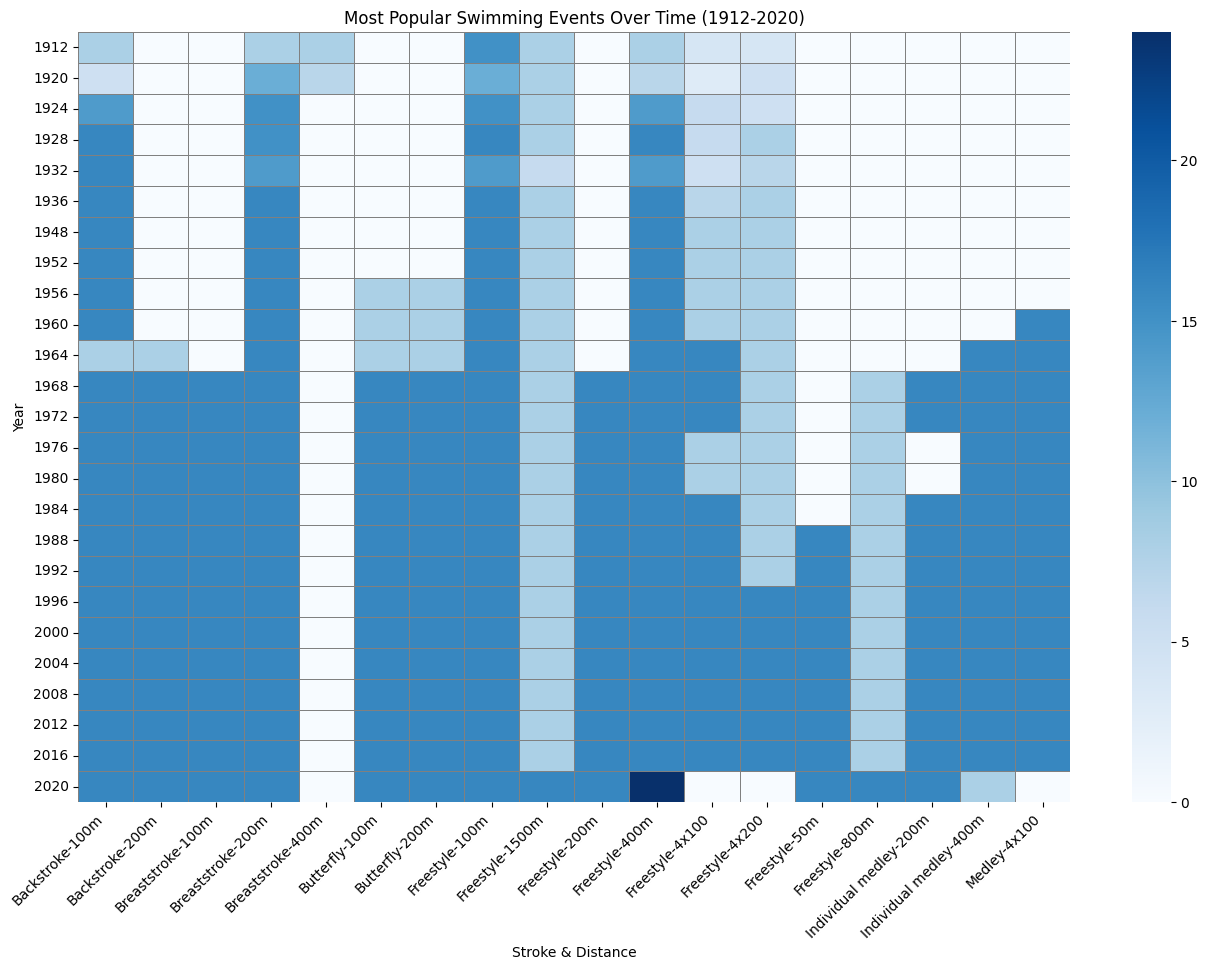

In [48]:
# Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Filter out missing values for relevant columns
df_cleaned = df.dropna(subset=["Year", "Distance (in meters)", "Stroke"])

# Group by year, stroke, and distance to count occurrences
event_counts = df_cleaned.groupby(["Year", "Stroke", "Distance (in meters)"]).size().reset_index(name="Count")

# Pivot the data to create a heatmap format (Years as rows, Strokes+Distances as columns)
heatmap_data = event_counts.pivot_table(index="Year", columns=["Stroke", "Distance (in meters)"], values="Count", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, linecolor="gray")

# Formatting
plt.title("Most Popular Swimming Events Over Time (1912-2020)")
plt.xlabel("Stroke & Distance")
plt.ylabel("Year")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

I decided to flip the axes such that year was on the x axis and stroke was on the y axis. Additionally, to enhance color contrast I used the PuBu color palette.

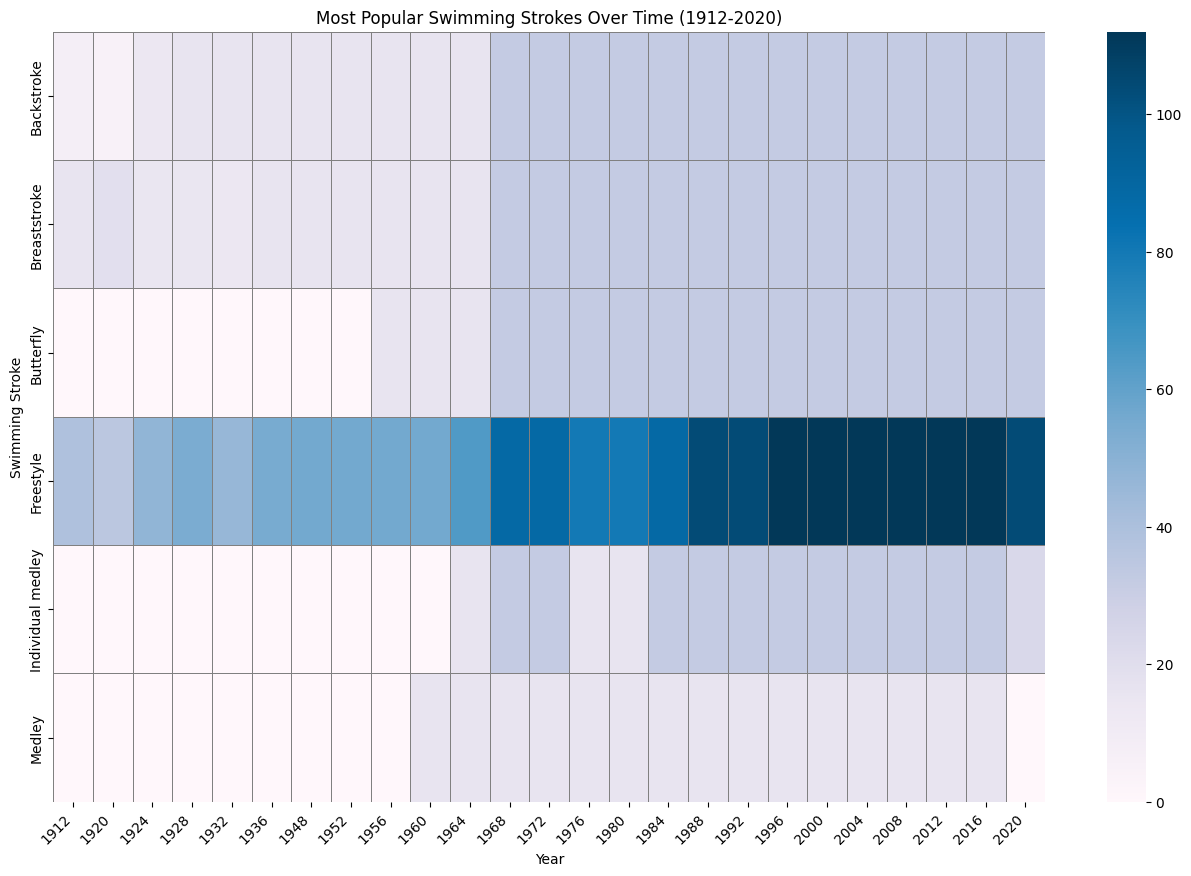

In [51]:
# Ensure Year is numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Filter out missing values for relevant columns
df_cleaned = df.dropna(subset=["Year", "Stroke"])

# Group by year and stroke to count occurrences
event_counts = df_cleaned.groupby(["Year", "Stroke"]).size().reset_index(name="Count")

# Pivot the data to create a heatmap format (Years as columns, Strokes as rows)
heatmap_data = event_counts.pivot_table(index="Stroke", columns="Year", values="Count", fill_value=0)

# Plot the heatmap with the PuBu color palette (lighter = less frequent, darker = more frequent)
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="PuBu", linewidths=0.5, linecolor="gray")

# Formatting
plt.title("Most Popular Swimming Strokes Over Time (1912-2020)")
plt.xlabel("Year")
plt.ylabel("Swimming Stroke")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

Analysis: Freestyle is the most consistently contested stroke
The yellow/green band for Freestyle shows it has been a core event for a long time.
It became even more popular from the 1960s onward.
Butterfly stroke was introduced later
Notice Butterfly has no activity before the 1950s, meaning it was not part of the early Olympics.
After introduction, its presence gradually increased.
Medley & Individual Medley were introduced later
Similar to Butterfly, these strokes were not part of early Olympics.
They gained popularity in later years (1950s onward).
Gaps in certain years (e.g., 1940s)
These correspond to World War II (1940 & 1944) when the Olympics were not held.
Some strokes have fluctuating popularity
Medley events show gaps and varying intensities, indicating they were not consistently included every Olympics.
Breaststroke & Backstroke have relatively steady inclusion but less than Freestyle.


Q2 - Which countries and athletes have dominated Olympic swimming?



Exploration 2a- which are the top 5 countries that have dominated swimming, segmented by male and female athletes.
Top 5 countries will be identfiied by countries with the most gold medals to highlight absolute dominance and underscore countries with the best swimmers

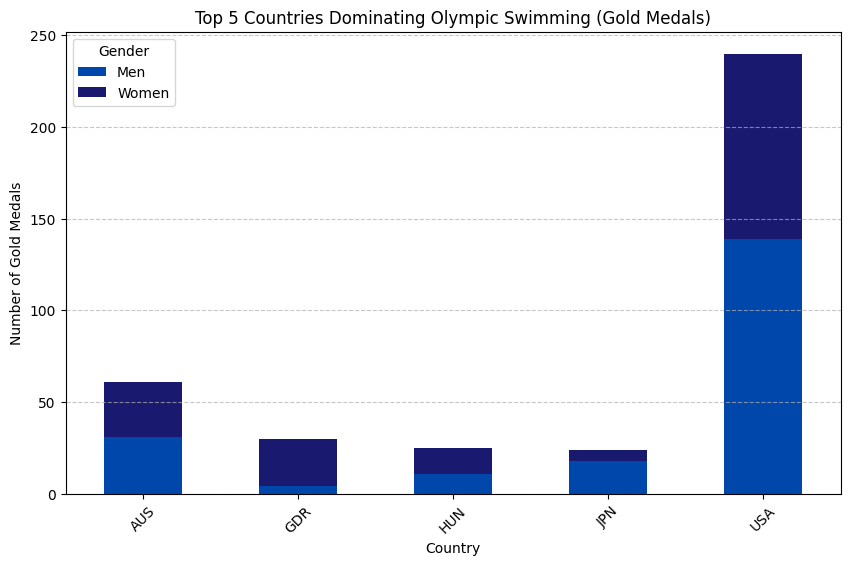

In [73]:
 #Convert 'Year' to numeric
df["Year"] = pd.to_numeric(df["Year"], errors='coerce')

# Filter only gold medalists (Rank = 1) and ensure relevant columns are present
gold_medalists = df[(df["Rank"] == 1)].dropna(subset=["Team", "Gender"])

# Group by country and gender to count gold medals
gold_medals_by_country_gender = gold_medalists.groupby(["Team", "Gender"]).size().reset_index(name="Gold Medals")

# Identify top 5 countries by total gold medals (both male & female combined)
top_countries = (
    gold_medals_by_country_gender.groupby("Team")["Gold Medals"].sum()
    .nlargest(5)
    .index
)

# Filter dataset for only the top 5 countries
top_gold_medals = gold_medals_by_country_gender[gold_medals_by_country_gender["Team"].isin(top_countries)]

# Pivot data for stacked bar chart
pivot_data = top_gold_medals.pivot(index="Team", columns="Gender", values="Gold Medals").fillna(0)
colors = ["#0047AB", "#191970"]  # Prussian blue for one gender, turquoise blue for the other


# Plot stacked bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6), color= colors)

# Formatting
plt.title("Top 5 Countries Dominating Olympic Swimming (Gold Medals)")
plt.xlabel("Country")
plt.ylabel("Number of Gold Medals")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

exploration 2b- I want to find out who are the top 5 gold medalist athletes of all times and did they dominate in one stroke or was an all round / multi-event winner.

<ipython-input-75-74bed012cd9c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_gold_medalists["Event"] = top_gold_medalists["Stroke"] + " " + top_gold_medalists["Distance (in meters)"].astype(str) + "m"


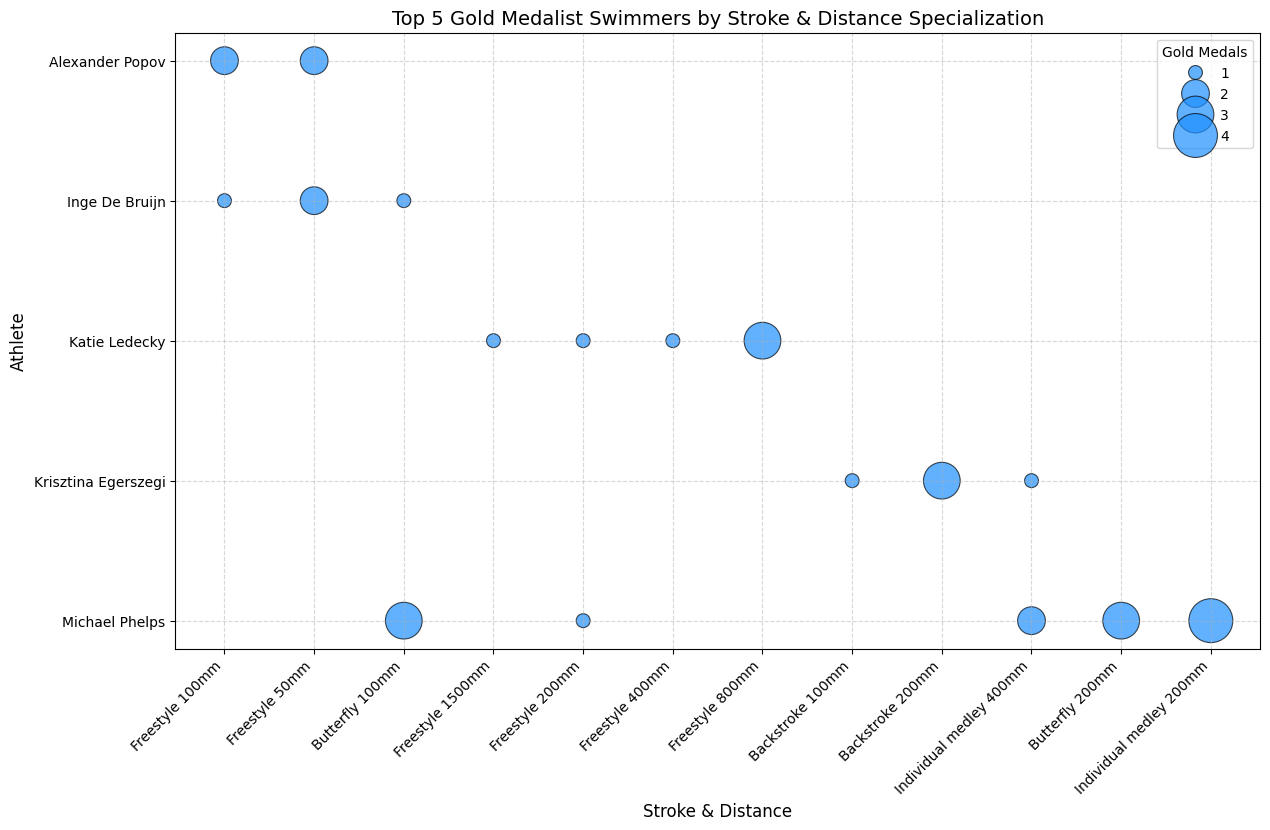

In [75]:
# Group by athlete to count total gold medals
# Filter only gold medalists (Rank = 1) and ensure relevant columns are present
gold_medalists = df[(df["Rank"] == 1)].dropna(subset=["Athlete", "Stroke", "Distance (in meters)"])

# Group by athlete to count total gold medals
top_athletes = (
    gold_medalists.groupby("Athlete")["Athlete"].count()
    .nlargest(5)
    .index
)

# Filter dataset for only the top 5 athletes
top_gold_medalists = gold_medalists[gold_medalists["Athlete"].isin(top_athletes)]

# Create a new column combining stroke and distance
top_gold_medalists["Event"] = top_gold_medalists["Stroke"] + " " + top_gold_medalists["Distance (in meters)"].astype(str) + "m"

# Count number of gold medals per event for each athlete
bubble_data = top_gold_medalists.groupby(["Athlete", "Event"]).size().reset_index(name="Gold Medals")

# Plot Bubble Chart
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=bubble_data,
    x="Event",
    y="Athlete",
    size="Gold Medals",
    sizes=(100, 1000),
    alpha=0.7,
    color="dodgerblue",
    edgecolor="black"
)

# Formatting
plt.title("Top 5 Gold Medalist Swimmers by Stroke & Distance Specialization", fontsize=14)
plt.xlabel("Stroke & Distance", fontsize=12)
plt.ylabel("Athlete", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gold Medals", loc="upper right")

# Show the plot
plt.show()

The bubble size represents the number of gold medals won by that swimmer in that particular event. Michael Phelps dominates across multiple strokes & distances.

Phelps has the largest bubbles, indicating he won many gold medals across different events.
He is the most versatile among the top 5 athletes.
Katie Ledecky’s dominance is mainly in Freestyle events.

Most of her bubbles are small, meaning she has fewer events but still won gold.
Alexander Popov and Inge De Bruijn have specialization.

Their bubbles are limited to specific events (Freestyle and Butterfly).
Inge De Bruijn shows strong butterfly specialization.
Alexander Popov is more dominant in sprint freestyle events.
Krisztina Egerszegi is dominant in backstroke.

Her medals are concentrated in Backstroke events, meaning she was a specialist rather than an all-around swimmer.

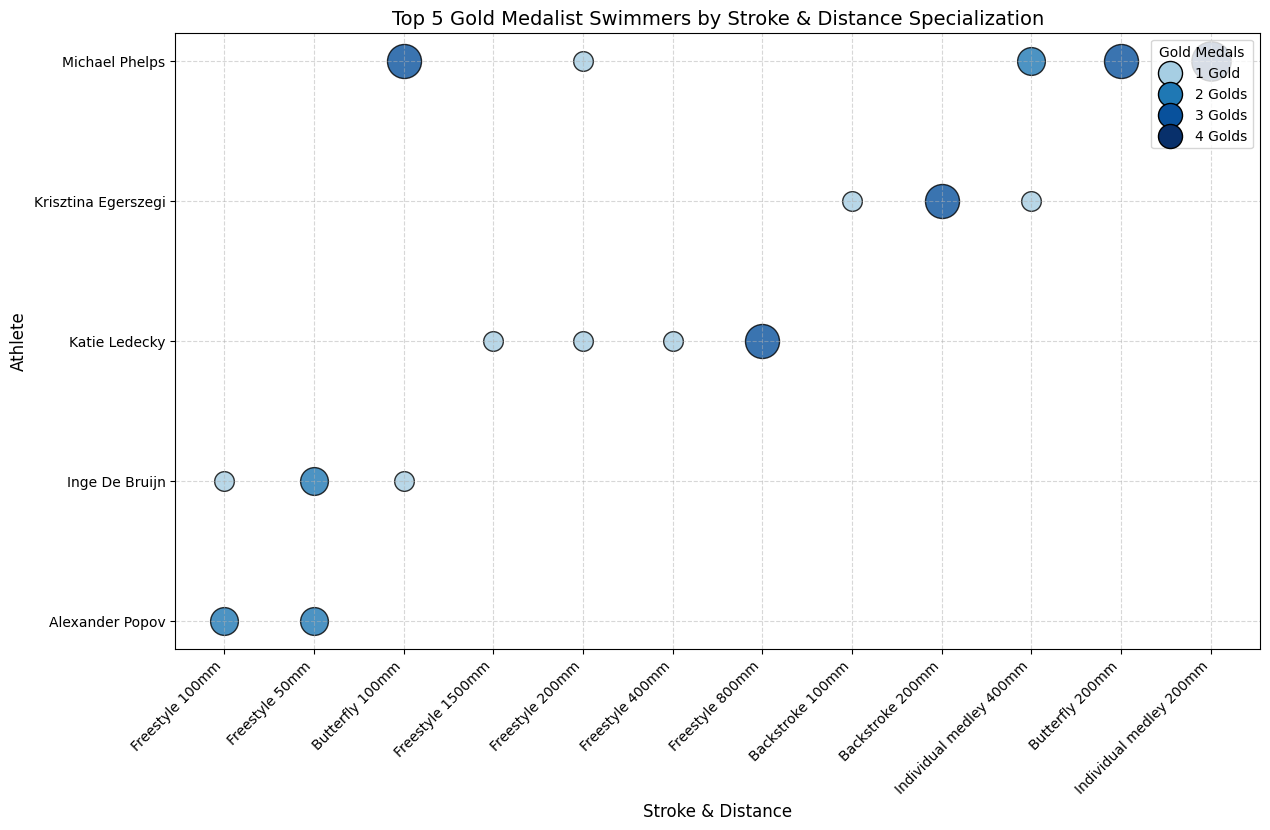

In [92]:
# Define 4 distinct shades of blue for 1, 2, 3, and 4 gold medals
color_mapping = {
    1: "#a6cee3",  # Light Blue
    2: "#1f78b4",  # Medium Blue
    3: "#08519c",  # Dark Blue
    4: "#08306b"   # Deepest Blue
}

# Ensure that only the available gold medal values are mapped correctly
bubble_data["Color"] = bubble_data["Gold Medals"].map(color_mapping)

# Plot Bubble Chart with 4 distinct blue shades
plt.figure(figsize=(14, 8))
for _, row in bubble_data.iterrows():
    plt.scatter(
        x=row["Event"],
        y=row["Athlete"],
        s=row["Gold Medals"] * 200,  # Adjust bubble size dynamically
        color=row["Color"],  # Use the predefined color mapping
        edgecolors="black",
        alpha=0.8
    )

# Create a custom legend for only 4 distinct colors
legend_labels = ["1 Gold", "2 Golds", "3 Golds", "4 Golds"]
handles = [plt.scatter([], [], s=300, color=color_mapping[i], edgecolors="black") for i in range(1, 5)]
plt.legend(handles, legend_labels, title="Gold Medals", loc="upper right", fontsize=10)

# Formatting
plt.title("Top 5 Gold Medalist Swimmers by Stroke & Distance Specialization", fontsize=14)
plt.xlabel("Stroke & Distance", fontsize=12)
plt.ylabel("Athlete", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

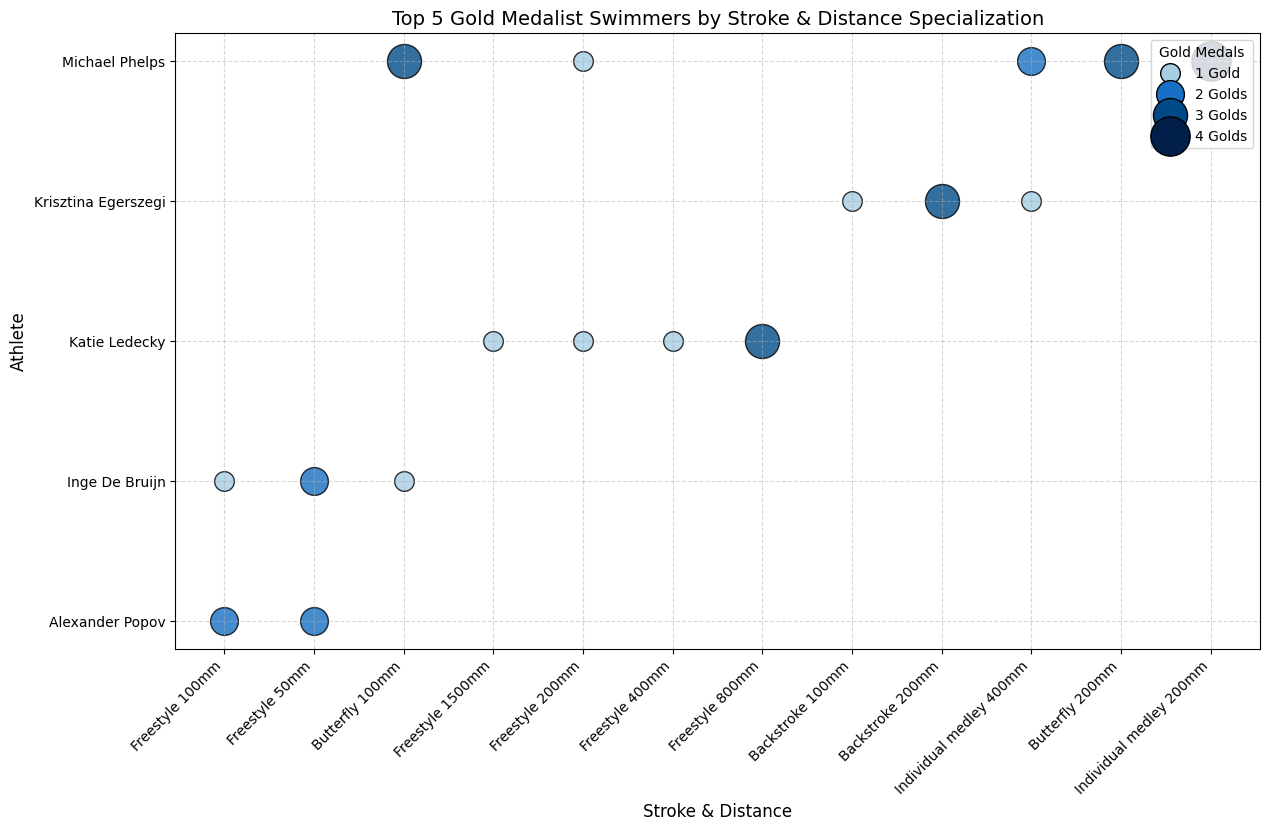

In [95]:
# Define 4 distinct shades of blue for 1, 2, 3, and 4 gold medals
color_mapping = {
    1: "#a6cee3",  # Light Blue (Same)
    2: "#1770c4",  # Brighter Medium Blue
    3: "#004b87",  # Darker Blue
    4: "#021f4b"   # Deepest Blue (Same)
}

# Define bubble sizes for legend (matching actual sizes in the plot)
legend_sizes = {1: 200, 2: 400, 3: 600, 4: 800}

# Ensure that only the available gold medal values are mapped correctly
bubble_data["Color"] = bubble_data["Gold Medals"].map(color_mapping)

# Plot Bubble Chart with 4 distinct blue shades
plt.figure(figsize=(14, 8))
for _, row in bubble_data.iterrows():
    plt.scatter(
        x=row["Event"],
        y=row["Athlete"],
        s=row["Gold Medals"] * 200,  # Adjust bubble size dynamically
        color=row["Color"],  # Use the predefined color mapping
        edgecolors="black",
        alpha=0.8
    )

# Create a custom legend for only 4 distinct colors with properly sized bubbles
legend_labels = ["1 Gold", "2 Golds", "3 Golds", "4 Golds"]
handles = [plt.scatter([], [], s=legend_sizes[i], color=color_mapping[i], edgecolors="black") for i in range(1, 5)]
plt.legend(handles, legend_labels, title="Gold Medals", loc="upper right", fontsize=10)

# Formatting
plt.title("Top 5 Gold Medalist Swimmers by Stroke & Distance Specialization", fontsize=14)
plt.xlabel("Stroke & Distance", fontsize=12)
plt.ylabel("Athlete", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()
